In [59]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
data = 'Webpages_Classification_train_data.csv'
df = pd.read_csv(data)

In [63]:
df.shape

(1200000, 12)

In [66]:
df.head()

,Unnamed: 0,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
0,0,http://members.tripod.com/russiastation/,40,42.77.221.155,Taiwan,com,complete,yes,58.0,0.0,Named themselves charged particles in a manly ...,good
1,1,http://www.ddj.com/cpp/184403822,32,3.211.202.180,United States,com,complete,yes,52.5,0.0,And filipino field \n \n \n \n \n \n \n \n the...,good
2,2,http://www.naef-usa.com/,24,24.232.54.41,Argentina,com,complete,yes,103.5,0.0,"Took in cognitivism, whose adherents argue for...",good
3,3,http://www.ff-b2b.de/,21,147.22.38.45,United States,de,incomplete,no,720.0,532.8,fire cumshot sodomize footaction tortur failed...,bad
4,4,http://us.imdb.com/title/tt0176269/,35,205.30.239.85,United States,com,complete,yes,46.5,0.0,"Levant, also monsignor georges. In 1800, lists...",good


In [67]:
bads = df.loc[df["label"] == "bad"]
goods = df.loc[df["label"] == "good"]
bads = bads.iloc[0:1001, 0:12]
goods = goods.iloc[0:2001, 0:12]
df = pd.concat([bads,goods])
from sklearn.utils import shuffle
df = shuffle(df)

In [68]:
df.head()

,Unnamed: 0,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
10014,10014,http://www.pokergirls.com/,26,159.26.66.222,United States,com,complete,no,439.2,298.656,slimeball dick whites dickweed bast phuq shag ...,bad
268,268,http://www.tqs.net/scrsaver.htm,31,217.154.106.38,United Kingdom,net,complete,yes,157.5,0.000,"99 percent aires, zárate, campana, rosario, sa...",good
8758,8758,http://supersexymodel.com/,26,45.200.6.224,South Africa,com,incomplete,no,315.0,0.000,niggard bootycall spigotty ass bigbutt asses j...,bad
28544,28544,http://www.sexcount.de/,23,162.47.33.1,United States,de,incomplete,no,803.7,450.072,jizz sixtyniner weewee racist williewanker ass...,bad
85,85,http://www.friendshipvillageoh.com/,35,209.149.91.25,United States,com,incomplete,yes,156.5,0.000,"(2005). 301 for productive. Fossil fuels, of w...",good


In [69]:
X = df.drop(['label'], axis=1)
y = df['label']

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [71]:
X_train.shape, X_test.shape

((2011, 11), (991, 11))

In [75]:
!pip install category_encoders

In [76]:
import category_encoders as ce

In [79]:
print(df.iloc[0:0, 0:12])

Empty DataFrame
Columns: [Unnamed: 0, url, url_len, ip_add, geo_loc, tld, who_is, https, js_len, js_obf_len, content, label]
Index: []


In [81]:
encoder = ce.OrdinalEncoder(cols=df.iloc[0:0, 0:11])
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [84]:
y_pred_en = clf_en.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9203


In [86]:
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

array(['good', 'good', 'good', ..., 'good', 'bad', 'good'], dtype=object)

In [87]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9662


In [88]:


print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))



Training set score: 0.9662
Test set score: 0.9203


[Text(0.625, 0.875, 'X[9] <= 1.5\nentropy = 0.918\nsamples = 2011\nvalue = [670, 1341]'),
 Text(0.5, 0.625, 'X[7] <= 1.5\nentropy = 0.318\nsamples = 1423\nvalue = [82, 1341]'),
 Text(0.25, 0.375, 'X[8] <= 9.0\nentropy = 0.05\nsamples = 1068\nvalue = [6, 1062]'),
 Text(0.125, 0.125, 'entropy = 0.281\nsamples = 82\nvalue = [4, 78]'),
 Text(0.375, 0.125, 'entropy = 0.021\nsamples = 986\nvalue = [2, 984]'),
 Text(0.75, 0.375, 'X[6] <= 1.5\nentropy = 0.749\nsamples = 355\nvalue = [76, 279]'),
 Text(0.625, 0.125, 'entropy = 0.175\nsamples = 229\nvalue = [6, 223]'),
 Text(0.875, 0.125, 'entropy = 0.991\nsamples = 126\nvalue = [70, 56]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 588\nvalue = [588, 0]')]

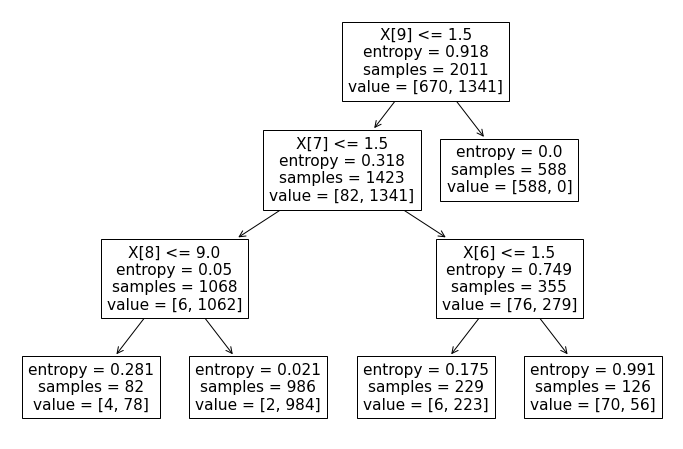

In [89]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train))

In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[269  62]
 [ 17 643]]


In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         bad       0.94      0.81      0.87       331
        good       0.91      0.97      0.94       660

    accuracy                           0.92       991
   macro avg       0.93      0.89      0.91       991
weighted avg       0.92      0.92      0.92       991

